In [1]:

#try:
#   
#    import numpy as np
#    import pandas as pd
#    import matplotlib.pyplot as plt
#    import seaborn as sns
#
#except:

    #initialize packges
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install matplotlib
!pip install openpyxl
import numpy as np
import pandas as pd
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB



In [2]:
#Cria função para ajudar na conversão para Float ( foi feito apartir da visualização de algusn dados da base)

In [3]:
#def convertfloatfromtitanic(value):    
#        try:
#            return float(value)
#        except (ValueError, TypeError):
#            return float(str(value).replace('.','',1))
#        return default

In [4]:
#importa a base de dados para o projeto

In [5]:
mydb = pd.read_excel("titanic_reduced_database.xlsx")

/srv/conda/envs/notebook/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [6]:
mydb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_passageiro             891 non-null    int64  
 1   sobrevivente              891 non-null    object 
 2   classe_da_passagem        891 non-null    int64  
 3   nome_passageiro           891 non-null    object 
 4   sexo                      891 non-null    object 
 5   idade                     714 non-null    float64
 6   irmaos_ou_esposa_a_bordo  891 non-null    int64  
 7   pais_filhos_a_bordo       891 non-null    int64  
 8   numero_passagem           891 non-null    object 
 9   valor_passagem            891 non-null    float64
 10  id_cabine                 204 non-null    object 
 11  local_de_embarque         889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [7]:
mydb.head()

,id_passageiro,sobrevivente,classe_da_passagem,nome_passageiro,sexo,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,numero_passagem,valor_passagem,id_cabine,local_de_embarque
0,1,nao,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,nao,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [8]:
# com isso foi notado a falta de alguns dados , que nesse primeiro momento de exploração da base 
# serão dropados quando forem requisitados, porem serão trados antes do treinamento
# apartir disso tomamos como passo inicial verificar correlações entre os dados

In [9]:
#convertemos a coluna sobrevivente para um valor binario 0 ou 1 para facilitar 

survive = {'sim' : 1, 'nao' : 0}

mydb['sobrevivente'] = mydb['sobrevivente'].map(survive) 


In [10]:
# criada uma cópia da base para analise de dados

data_for_analyis = mydb.copy()

In [11]:
# criamos as primeiras correlações que aparentaram ser relevantes , sendo essas um agrupamento das idades
# e um apontamento da existência de parentes na embarcação


data_for_analyis['familia_a_bordo'] = (data_for_analyis['irmaos_ou_esposa_a_bordo'] > 0) | (data_for_analyis['pais_filhos_a_bordo'] > 0)
data_for_analyis['classificacao_idade'] = pd.cut(data_for_analyis['idade'], [0, 15, 80], labels=['crianca', 'adulto'])

In [12]:
# removemos todas as informações pessoais que não seriam de grande ajuda para a analise( não impactam na sobrevivencia) ,
# bem como a cabine uma vez que ela possui mais registros vazios do preenchidos e as informações relativas a parentesco
# já que foram mescladas em uma nova feature

data_for_analyis.drop(['id_passageiro', 'nome_passageiro', 'irmaos_ou_esposa_a_bordo', 'pais_filhos_a_bordo', 'numero_passagem', 'id_cabine'], axis=1, inplace=True)

data_for_analyis.describe()

,sobrevivente,classe_da_passagem,idade,valor_passagem
count,891.000000,891.000000,714.000000,8.910000e+02
mean,0.383838,2.308642,29.699118,1.271697e+05
std,0.486592,0.836071,14.526497,4.112720e+05
min,0.000000,1.000000,0.420000,0.000000e+00
25%,0.000000,2.000000,20.125000,1.445000e+01
50%,0.000000,3.000000,28.000000,7.100000e+01
75%,1.000000,3.000000,38.000000,7.895800e+04
max,1.000000,3.000000,80.000000,5.123292e+06


In [13]:
# para começar a analise o foram levantadas as seguintes possiveis corelações :
# sexo como fator de sobrevivência
# idade como fator de sobrevivência
# classe como fator de sobrevivência
# local de embarque como fator de sobreviência 
# presença de familia como fato de sobrevivência

In [14]:
# relação sexo - sobrevivencia 

rate_sex = data_for_analyis.groupby('sexo')['sobrevivente'].mean().round(4)
rate_sex

sexo
female    0.7420
male      0.1889
Name: sobrevivente, dtype: float64

In [15]:
# relação idade - sobrevivencia 

rate_age = data_for_analyis.groupby('classificacao_idade')['sobrevivente'].mean().round(4)
rate_age

classificacao_idade
crianca    0.5904
adulto     0.3819
Name: sobrevivente, dtype: float64

In [16]:
# relação classe - sobrevivencia 

rate_class = data_for_analyis.groupby('classe_da_passagem')['sobrevivente'].mean().round(4)
rate_class

classe_da_passagem
1    0.6296
2    0.4728
3    0.2424
Name: sobrevivente, dtype: float64

In [17]:
# relação local de embarque - sobrevivencia

rate_boarding = data_for_analyis.groupby('local_de_embarque')['sobrevivente'].mean().round(4)
rate_boarding

local_de_embarque
C    0.5536
Q    0.3896
S    0.3370
Name: sobrevivente, dtype: float64

In [18]:
# relação familia - sobrevivencia 

rate_family = data_for_analyis.groupby('familia_a_bordo')['sobrevivente'].mean().round(4)
rate_family

familia_a_bordo
False    0.3035
True     0.5056
Name: sobrevivente, dtype: float64

In [19]:
# apos essa coleta de informações, foram gerados gráficos para melhor vizualizar os dados obtidos

In [20]:
# função para escrita das labels nos gráficos
def addlabels(plt,x,y,space,color):
    for i in range(len(x)):
        plt.text(i, y[i]+space, y[i], ha = 'center',
                 bbox = dict(facecolor = color, alpha =.8))

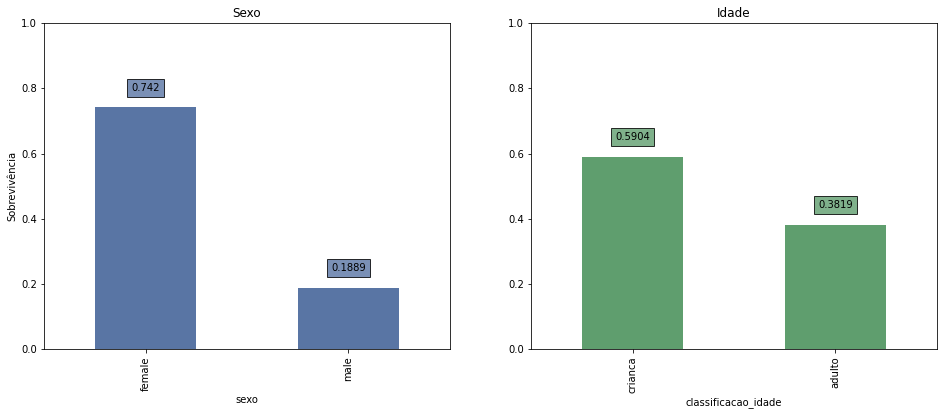

In [21]:
# Graficos Idade e Sexo
fig, (axis1,axis2) = plt.subplots(1 ,2, figsize=(16,6))

lbspace = .05

axcolor = '#5975A4'
ax = rate_sex.plot.bar(ax=axis1, color=axcolor, title='Sexo')
ax.set_ylabel('Sobrevivência')
ax.set_ylim(0.0,1.0)
addlabels(ax,rate_sex,rate_sex,lbspace,axcolor)

axcolor = '#5F9E6E'
ax = rate_age.plot.bar(ax=axis2, color=axcolor, title='Idade')
ax.set_ylim(0.0,1.0)
addlabels(ax,rate_age,rate_age,lbspace,axcolor)


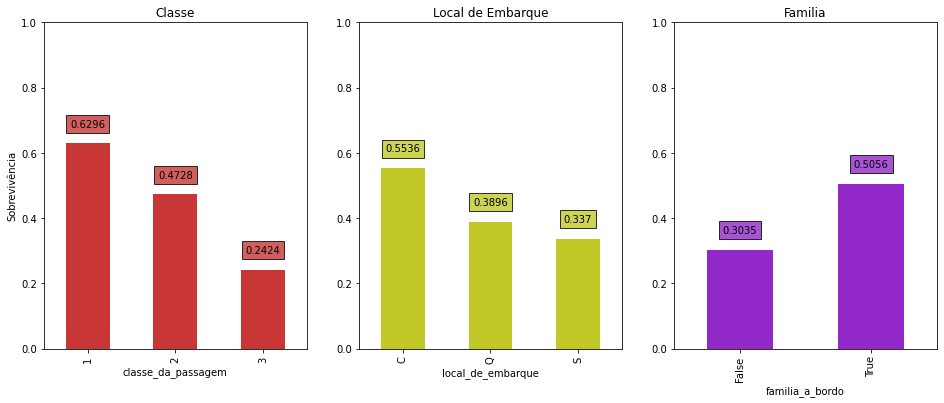

In [22]:
# Graficos Classe , Embarque e Familia
fig, (axis1,axis2,axis3) = plt.subplots(1 ,3, figsize=(16,6))

lbspace = .05

axcolor = '#c93636'
ax = rate_class.plot.bar(ax=axis1, color=axcolor, title='Classe')
ax.set_ylabel('Sobrevivência')
ax.set_ylim(0.0,1.0)
addlabels(ax,rate_class,np.array(rate_class),lbspace,axcolor) # razoes desconhecidas ele crashava sem convertar pra array

axcolor = '#c1c928'
ax = rate_boarding.plot.bar(ax=axis2, color=axcolor, title='Local de Embarque')
ax.set_ylim(0.0,1.0)
addlabels(ax,rate_boarding,rate_boarding,lbspace,axcolor)

axcolor = '#9328c9'
ax = rate_family.plot.bar(ax=axis3, color=axcolor, title='Familia')
ax.set_ylim(0.0,1.0)
addlabels(ax,rate_family,rate_family,lbspace,axcolor)


In [23]:
# Com isso conseguimos obter alguns dados intessantes primeiramente é possivél constatar que
# mulheres e crianças são as duas populações que apresentam o maior indice de sobrevivientes com a maior clareza na distinção
# o que nos faz conluir que nosso modelo terá que conter pelo menos essas duas features
# os outros 3 relacionamentos por mais promissores que eles também paresçam, podem conter uma sobreposição entre eles
# então foram feitos novos testes , tendo como base as features já selecionadas

#ignorar texto de cima proem eu gostei dele , porem estou fazendo isso 3 da manhã
## ------------------------------------

## Com isso conseguimos obter alguns dados intessantes primeiramente é possivél constatar que
## mulheres , crianças , passageiros da primeira classe tem altos indices de sobrevivência
## o nos diz que as features 'classe_da_passagem' , 'sexo' e 'idade' são cruiciais na hora
## de determinar a sobrevivência de um individuo, com isso em mente vamos fazer uma analize mais detalhada das mesmas


grouped = pd.concat(
    [data_for_analyis.groupby(['classe_da_passagem', 'sexo', 'classificacao_idade'])['sobrevivente'].mean().round(4),
     data_for_analyis.groupby(['classe_da_passagem', 'sexo', 'classificacao_idade'])['sobrevivente'].count()],
    axis=1)
grouped.columns = ['sobrevivente', 'total de pessoas']
grouped

sobrevivente  total de pessoas
classe_da_passagem sexo   classificacao_idade                                
1                  female crianca                    0.6667                 3
                          adulto                     0.9756                82
                   male   crianca                    1.0000                 3
                          adulto                     0.3776                98
2                  female crianca                    1.0000                10
                          adulto                     0.9062                64
                   male   crianca                    1.0000                 9
                          adulto                     0.0667                90
3                  female crianca                    0.5333                30
                          adulto                     0.4306                72
                   male   crianca                    0.3214                28
                          adulto                     0.1289               225

In [24]:
# to write on catplot bars 
def catplotbarswriter(ax):
    for c in ax.containers:
        labels = [f'{(v.get_height().round(4))}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

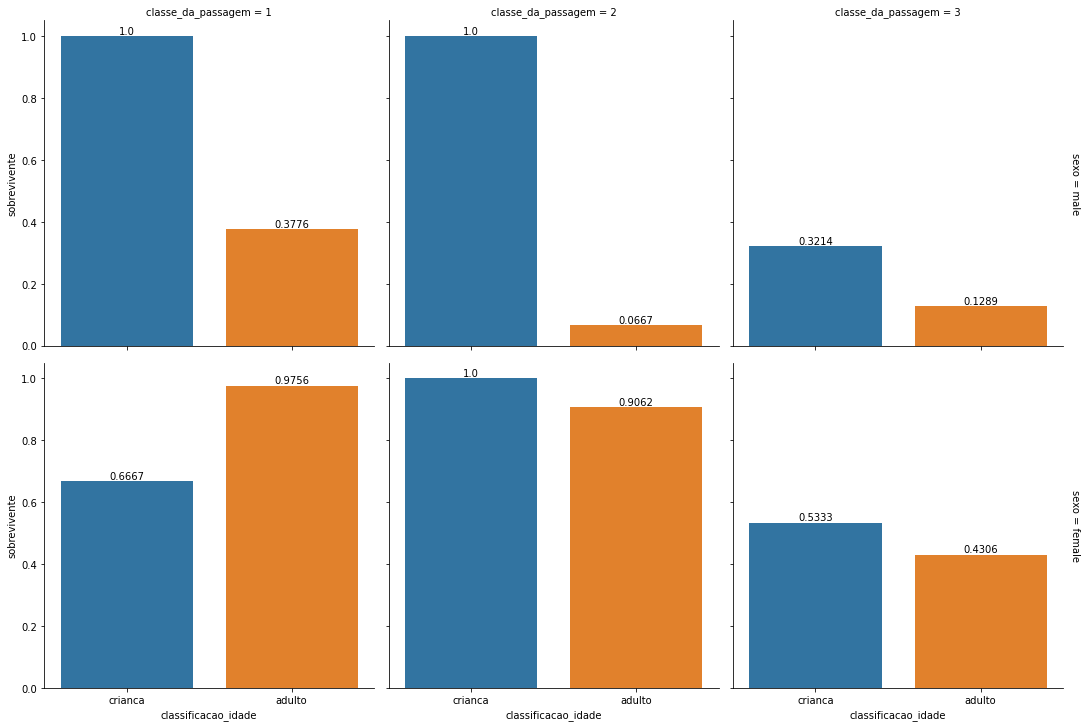

In [75]:
g = sns.catplot(
    x='classificacao_idade', 
    y='sobrevivente', 
    col='classe_da_passagem',
    row='sexo',
    data=data_for_analyis,
    margin_titles=True, 
    kind="bar", 
    ci=None)

# extract the matplotlib axes_subplot objects from the FacetGrid
catplotbarswriter(g.facet_axis(0, 0))
catplotbarswriter(g.facet_axis(0, 1))
catplotbarswriter(g.facet_axis(0, 2))
catplotbarswriter(g.facet_axis(1, 0))
catplotbarswriter(g.facet_axis(1, 1))
catplotbarswriter(g.facet_axis(1, 2))



In [26]:
## Com isso conseguimos reparar alguns padrões nos sobreviventes, primeiramente houve uma priorização
## de mulheres , crianças , passageiros da primeira nessa ordem, observamos também que a taxa de sobrevivencia
## das crianças mulheres da 1º classe é 66% o que significa que 1 das 3 crianças morreu, e olhando graficamente
## provavlemente foi por causa de algum fator aleatório, uma vez que todas as crianças da 1 e 2 classe foram salvas
## com execessão dela

In [27]:
## antes de finalmente definir um modelo , vamos olhar a presença da familia nos sobreviventes

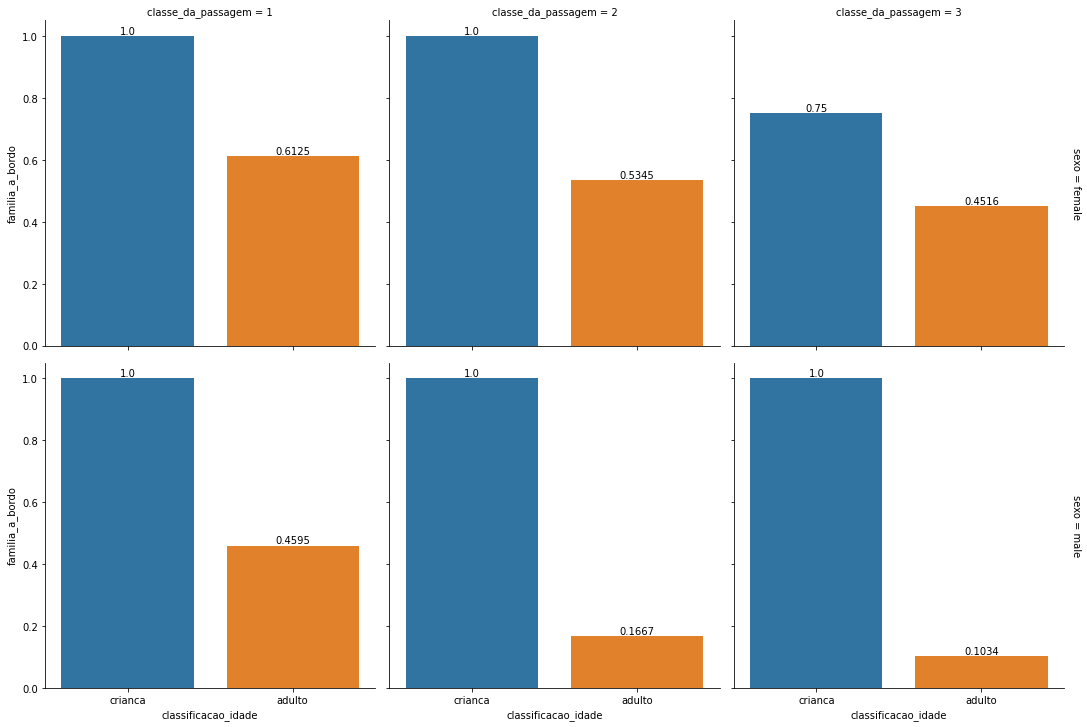

In [28]:
g = sns.catplot(
    x='classificacao_idade', 
    y='familia_a_bordo', 
    col='classe_da_passagem',
    row='sexo',
    data=data_for_analyis[data_for_analyis['sobrevivente']==1],
    margin_titles=True, 
    kind="bar", 
    ci=None)

catplotbarswriter(g.facet_axis(0, 0))
catplotbarswriter(g.facet_axis(0, 1))
catplotbarswriter(g.facet_axis(0, 2))
catplotbarswriter(g.facet_axis(1, 0))
catplotbarswriter(g.facet_axis(1, 1))
catplotbarswriter(g.facet_axis(1, 2))


In [29]:
## Com isso conseguimos reparar que a presença de parentes é algo quase que obrigatório para a sobrevivencia das crianças
## porem essa fuature pode não ter masi nenhum relacionamento com as outras coisas

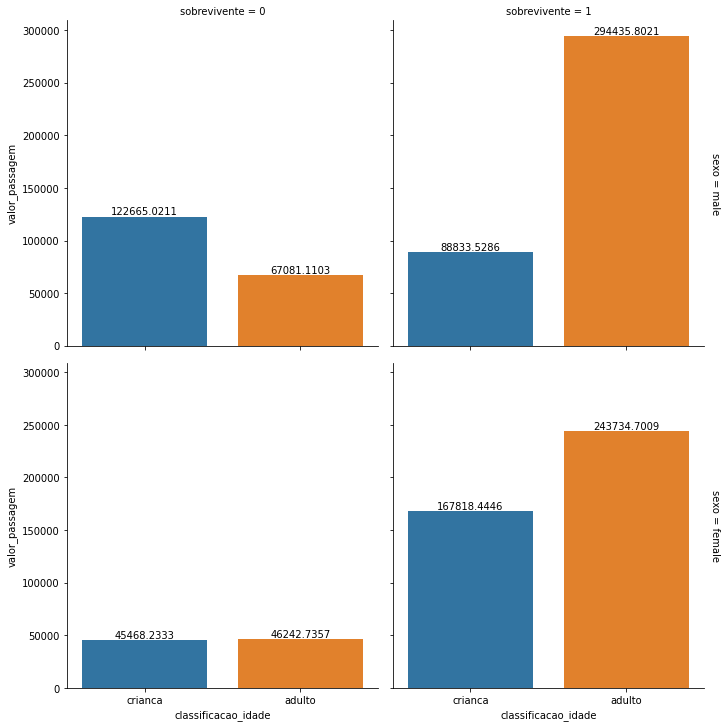

In [76]:
#apagar

g = sns.catplot(
    x='classificacao_idade', 
    y='valor_passagem', 
    col='sobrevivente',
    row='sexo',
    data=data_for_analyis,
    margin_titles=True, 
    kind="bar", 
    ci=None)

# extract the matplotlib axes_subplot objects from the FacetGrid
catplotbarswriter(g.facet_axis(0, 0))
catplotbarswriter(g.facet_axis(0, 1))
catplotbarswriter(g.facet_axis(1, 0))
catplotbarswriter(g.facet_axis(1, 1))



In [96]:
## com essa analise feita vamos inicar a criação do modelo

In [122]:
fortest = mydb.copy()

In [123]:
mean = fortest["idade"].mean()
std = fortest["idade"].std()

null_range = fortest["idade"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = null_range)
idadecolumn = fortest["idade"].copy()
idadecolumn[np.isnan(idadecolumn)] = rand_age
fortest["idade"] = idadecolumn
fortest["idade"] = fortest["idade"].astype(int)
fortest["idade"].isnull().sum()

0

In [124]:
## criamos os mesmos grupos utilizados na analize de dados

In [125]:
boarding = {'S' : 0, 'C' : 1,'Q' : 2}

fortest['local_de_embarque'] = fortest['local_de_embarque'].fillna('S')
fortest['local_de_embarque'] = fortest['local_de_embarque'].map(boarding) 

In [126]:
gender = {"male" : 0, "female" : 1}

fortest["sexo"] = fortest["sexo"].map(gender)

In [127]:
fortest.drop(['id_passageiro','nome_passageiro', 'numero_passagem', 'id_cabine'], axis=1, inplace=True)


In [128]:
fortest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sobrevivente              891 non-null    int64  
 1   classe_da_passagem        891 non-null    int64  
 2   sexo                      891 non-null    int64  
 3   idade                     891 non-null    int64  
 4   irmaos_ou_esposa_a_bordo  891 non-null    int64  
 5   pais_filhos_a_bordo       891 non-null    int64  
 6   valor_passagem            891 non-null    float64
 7   local_de_embarque         891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [129]:
X_train = fortest.drop("sobrevivente", axis=1)
Y_train = fortest["sobrevivente"]
X_test  = fortest.drop(columns=['sobrevivente']).copy()

In [130]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


In [131]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [132]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [133]:
perceptron = Perceptron(max_iter=7)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [134]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [135]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.43,Random Forest
98.43,Decision Tree
66.11,Naive Bayes
61.62,Stochastic Gradient Decent
39.84,Perceptron


In [136]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.80898876 0.75280899 0.79775281 0.78651685 0.80898876
 0.85393258 0.82022472 0.80898876 0.82022472]
Mean: 0.8058426966292135
Standard Deviation: 0.02457979130584327


In [137]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
score1 = cross_val_score(dt,X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", score1)
print("Mean:", score1.mean())
print("Standard Deviation:", score1.std())

Scores: [0.77777778 0.7752809  0.75280899 0.76404494 0.75280899 0.79775281
 0.82022472 0.79775281 0.76404494 0.79775281]
Mean: 0.7800249687890137
Standard Deviation: 0.02139753836267521


In [139]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)


,importance
feature,
idade,0.270
sexo,0.266
valor_passagem,0.249
classe_da_passagem,0.095
irmaos_ou_esposa_a_bordo,0.048
pais_filhos_a_bordo,0.039
local_de_embarque,0.032


In [140]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(decision_tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
sexo,0.306
valor_passagem,0.243
idade,0.226
classe_da_passagem,0.109
irmaos_ou_esposa_a_bordo,0.053
local_de_embarque,0.036
pais_filhos_a_bordo,0.027
